In [4]:
from random import random
import json
import pandas as pd

In [83]:
#Process data for modelling
all_data = pd.read_csv('./MODEL.CSV')
train_set = all_data.iloc[:len(all_data['EXPORT_VOLUME'].values)-12]
validation_set = all_data.iloc[len(all_data['EXPORT_VOLUME'].values)-13:len(all_data['EXPORT_VOLUME'].values)]

print('number of training records : ', len(data))
print('training until : ' , train_set['Month'][len(data)-1])

#data = [x + random() for x in range(1, 100)]
data = train_set['EXPORT_VOLUME'].values

number of training records :  144
training until :  Dec  2017


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


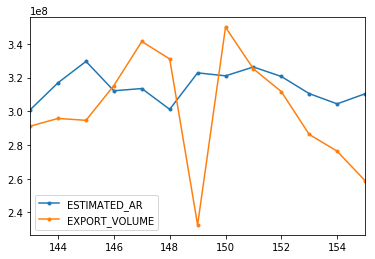

In [84]:
#Autoregression
from statsmodels.tsa.ar_model import AR

# fit model
model = AR(data)
model_fit = model.fit()

# make prediction
predictions = model_fit.predict(len(train_set),len(train_set)+12)
#print(len(predictions)
yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_AR'] = yhats
validation_set[['ESTIMATED_AR','EXPORT_VOLUME']].plot(style='.-')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


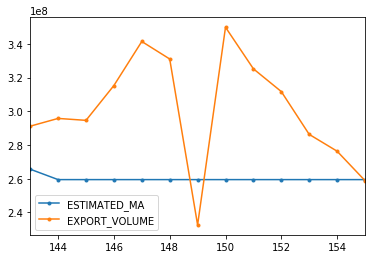

In [92]:
#Moving Average
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
# make prediction
predictions = model_fit.predict(len(train_set),len(train_set)+12)
#print(len(predictions)
yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_MA'] = yhats
validation_set[['ESTIMATED_MA','EXPORT_VOLUME']].plot(style='.-')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


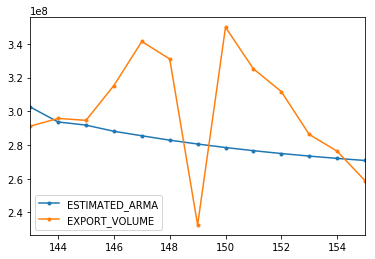

In [98]:
#Auto Regressive Moving Average (ARMA)

# fit model
model = ARMA(data, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(train_set),len(train_set)+12)


yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_ARMA'] = yhats
validation_set[['ESTIMATED_ARMA','EXPORT_VOLUME']].plot(style='.-')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


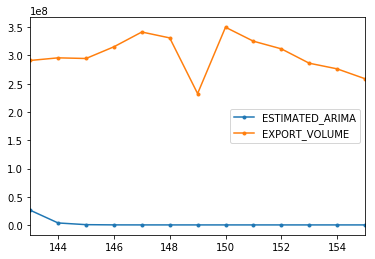

In [99]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
predictions = model_fit.predict(len(train_set),len(train_set)+12)

yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_ARIMA'] = yhats
validation_set[['ESTIMATED_ARIMA','EXPORT_VOLUME']].plot(style='.-')

In [124]:
print([200 + random()])

[200.46959423817162]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


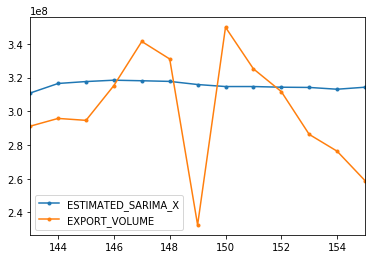

In [142]:
#SARIMA with Exogenous regressors
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data1 = data
data2 = train_set['SICOM_PRICE'].values
# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
exog2 = pd.DataFrame(validation_set['SICOM_PRICE'])

predictions = model_fit.predict(len(train_set),len(train_set)+12, exog=exog2)
# make prediction
yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_SARIMA_X'] = yhats
validation_set[['ESTIMATED_SARIMA_X','EXPORT_VOLUME']].plot(style='.-')

In [ ]:
# Vector Autoregression (VAR) - Not suitable for non-seasonal ts

In [ ]:
# Vector Autoregression Moving-Average (VARMA) - Not suitable for non-seasonal ts

In [ ]:
# Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) -  Not suitable for non-seasonal ts

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


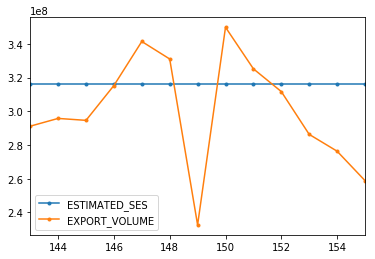

In [144]:
# Simple Exponential Smoothing (SES) -  Not suitable for non-seasonal ts
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(len(train_set),len(train_set)+12)

yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_SES'] = yhats
validation_set[['ESTIMATED_SES','EXPORT_VOLUME']].plot(style='.-')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


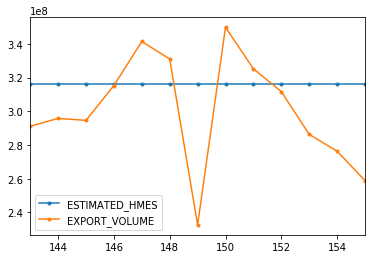

In [145]:
# Holt Winte's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()

# make prediHMESon
predictions = model_fit.predict(len(train_set),len(train_set)+12)

yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_HMES'] = yhats
validation_set[['ESTIMATED_HMES','EXPORT_VOLUME']].plot(style='.-')